# Pose estimation for Gradient Boost Classifier
Using [this model](https://sigmoidal.ai/en/real-time-human-pose-estimation-using-mediapipe/) to get a pose estimation to then process further for a simpler model.

In [63]:
import random
import os
from pathlib import Path

from transformers import AutoImageProcessor, SuperPointForKeypointDetection, AutoModelForObjectDetection, pipeline
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd
import mediapipe as mp
import cv2


total files: 705
random file chosen C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_classifier\images_cropped\backhand\seq_038\B_038_002.jpeg


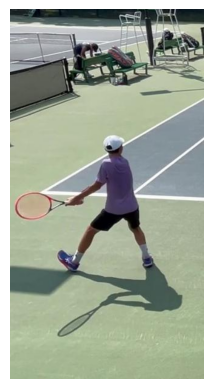

In [48]:
# load random image
DATA_PATH = Path(
    r"C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_classifier\images_cropped")

all_file_paths = []
for path in DATA_PATH.glob("**/*"):
    if path.is_file() and path.suffix == ".jpeg":
        all_file_paths.append(path)

print(f"total files: {len(all_file_paths)}")
random_file_path = random.choice(all_file_paths)
print(f"random file chosen {random_file_path}")

random_image = cv2.imread(str(random_file_path))
random_image_width = random_image.shape[1]
random_image_height = random_image.shape[0]

fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(random_image[...,::-1])

In [49]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [60]:
with mp_pose.Pose(static_image_mode=True) as pose:
    annotated_img = random_image.copy()
    # Processes the image.
    results = pose.process(random_image)
    # Set the circle radius for drawing the 'landmarks'.
    # The radius is scaled as a percentage of the image's height.
    circle_radius = int(.007 * random_image_height)
    # Specifies the drawing style for the 'landmarks'.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)
    # Draws the 'landmarks' on the image.
    mp_drawing.draw_landmarks(annotated_img,
                              landmark_list=results.pose_landmarks,
                              landmark_drawing_spec=point_spec)


0.49119043350219727


C:\Git\fhnw-mas-data-science\computer-vision-project-tennis\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [51]:
# Make a copy of the original image.
annotated_img = random_image.copy()
# Specifies the drawing style for landmark connections.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
# Draws both the landmark points and connections.
mp_drawing.draw_landmarks(
    annotated_img,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=point_spec,
    connection_drawing_spec=line_spec
)

In [52]:
# Select the coordinates of the points of interest.
l_shoulder_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * random_image_width)
l_shoulder_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * random_image_height)
l_elbow_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * random_image_width)
l_elbow_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * random_image_height)
l_wrist_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * random_image_width)
l_wrist_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * random_image_height)
l_hip_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * random_image_width)
l_hip_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * random_image_height)

r_shoulder_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * random_image_width)
r_shoulder_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * random_image_height)
r_elbow_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * random_image_width)
r_elbow_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * random_image_height)
r_wrist_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * random_image_width)
r_wrist_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * random_image_height)
r_hip_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * random_image_width)
r_hip_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * random_image_height)

l_ear_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].x * random_image_width)
l_ear_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].y * random_image_height)
r_ear_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EAR].x * random_image_width)
r_ear_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EAR].y * random_image_height)


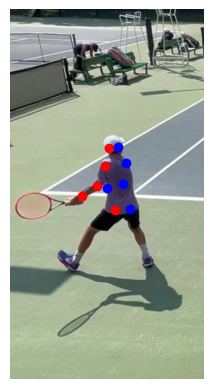

In [53]:
# Displaying a graph with the selected points.
fig2, ax2 = plt.subplots()
ax2.set_axis_off()
ax2.imshow(random_image[:, :, ::-1])
ax2.plot([l_shoulder_x, l_elbow_x, l_wrist_x, l_hip_x, l_ear_x], [l_shoulder_y, l_elbow_y, l_wrist_y, l_hip_y, l_ear_y], 'ro')
ax2.plot([r_shoulder_x, r_elbow_x, r_wrist_x, r_hip_x, r_ear_x], [r_shoulder_y, r_elbow_y, r_wrist_y, r_hip_y, r_ear_y], 'bo')
plt.show()

# Define Features
We define the shoulder, elbow, wrist and ear position on each side relative to the hips middle position (hips left and hips right) normalized to the image size.

X-Axis: A negative value indicates its position is on the **left** of the hip center

Y-Axis: A negative value indicates its position is **below** the hip center


In [65]:
def get_pose_features_of_image(pose_estimator, image_path: Path) -> dict[str, float]:
    image = cv2.imread(str(image_path))
    results = pose_estimator.process(image)
    
    if results.pose_landmarks is None:
        print(f"FAILED FOR IMAGE {image_path}")
        return {"relLeftShoulderX": np.nan,
            "relLeftShoulderY": np.nan,
            "relLeftElbowX": np.nan,
            "relLeftElbowY": np.nan,
            "relLeftWristX": np.nan,
            "relLeftWristY": np.nan,
            "relRightShoulderX": np.nan,
            "relRightShoulderY": np.nan,
            "relRightElbowX": np.nan,
            "relRightElbowY": np.nan,
            "relRightWristX": np.nan,
            "relRightWristY": np.nan}
        
    l_hip_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x
    l_hip_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y
    
    r_hip_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x
    r_hip_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y
    
    center_hip_x = (l_hip_x + r_hip_x) / 2
    center_hip_y = (l_hip_y + r_hip_y) / 2
    
    l_shoulder_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x
    l_shoulder_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y 
    l_elbow_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x
    l_elbow_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y 
    l_wrist_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x
    l_wrist_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y 
    
    r_shoulder_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x
    r_shoulder_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y 
    r_elbow_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x
    r_elbow_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y 
    r_wrist_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x
    r_wrist_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y 
    
    return {"relLeftShoulderX": l_shoulder_x - center_hip_x,
            "relLeftShoulderY": l_shoulder_y - center_hip_y,
            "relLeftElbowX": l_elbow_x - center_hip_x,
            "relLeftElbowY": l_elbow_y - center_hip_y,
            "relLeftWristX": l_wrist_x - center_hip_x,
            "relLeftWristY": l_wrist_y - center_hip_y,
            "relRightShoulderX": r_shoulder_x - center_hip_x,
            "relRightShoulderY": r_shoulder_y - center_hip_y,
            "relRightElbowX": r_elbow_x - center_hip_x,
            "relRightElbowY": r_elbow_y - center_hip_y,
            "relRightWristX": r_wrist_x - center_hip_x,
            "relRightWristY": r_wrist_y - center_hip_y}
        
    

def get_pose_features(pose_estimator, folder_path: Path, initial_dataframe: pd.DataFrame | None = None):
    label = folder_path.name
    features = []
    for sequence_folder in folder_path.iterdir():
        if not sequence_folder.is_dir():
            continue
        sequence_identifier = int(sequence_folder.name.split("_")[1])
        for image_path in sequence_folder.glob("*.jpeg"):
            index_in_sequence = int(image_path.stem.split("_")[2])
            
            image_features = get_pose_features_of_image(pose_estimator, image_path)
            image_features.update({"sequenceIdentifier": sequence_identifier,
                             "indexInSequence": index_in_sequence,
                             "label": label})
            
            features.append(image_features)
            
    new_pose_features = pd.DataFrame(features)
    if initial_dataframe is not None:
        return pd.concat([initial_dataframe, new_pose_features]).reset_index(drop=True)
    
    return new_pose_features
            
with mp_pose.Pose(static_image_mode=True) as pose_estimator:        
    pose_features = get_pose_features(pose_estimator, DATA_PATH.joinpath("backhand")) 
    pose_features = get_pose_features(pose_estimator, DATA_PATH.joinpath("forehand"), initial_dataframe=pose_features)     
    pose_features = get_pose_features(pose_estimator, DATA_PATH.joinpath("serve"), initial_dataframe=pose_features)
            
pose_features.sample(10)

C:\Git\fhnw-mas-data-science\computer-vision-project-tennis\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


FAILED FOR IMAGE C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_classifier\images_cropped\backhand\seq_020\B_020_004.jpeg
FAILED FOR IMAGE C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_classifier\images_cropped\backhand\seq_044\B_044_000.jpeg
FAILED FOR IMAGE C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_classifier\images_cropped\backhand\seq_048\B_048_003.jpeg
FAILED FOR IMAGE C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_classifier\images_cropped\forehand\seq_014\F_014_003.jpeg
FAILED FOR IMAGE C:\Users\simu_\OneDrive\Dokumente\Studium Weiterbildung\2023 MAS Data Science FHNW\04_Projektarbeiten\20241102_CAS_Deep_Learning\Tennis_cla

,relLeftShoulderX,relLeftShoulderY,relLeftElbowX,relLeftElbowY,relLeftWristX,relLeftWristY,relRightShoulderX,relRightShoulderY,relRightElbowX,relRightElbowY,relRightWristX,relRightWristY,sequenceIdentifier,indexInSequence,label
575,-0.148395,-0.113167,-0.249379,-0.067579,-0.271131,-0.154237,-0.054004,-0.174765,-0.087171,-0.261327,-0.145125,-0.344839,6,0,serve
469,-0.197650,-0.229027,-0.284675,-0.133795,-0.251083,-0.161745,0.061695,-0.254579,-0.028616,-0.163581,-0.172097,-0.185868,32,4,forehand
111,-0.123961,-0.238900,-0.123531,-0.114173,-0.244576,-0.036514,-0.112689,-0.237047,-0.151945,-0.121593,-0.268209,-0.044655,22,1,backhand
678,-0.136193,-0.068735,-0.029914,-0.051168,0.062786,-0.052216,-0.118083,-0.114503,-0.068380,-0.169608,-0.021591,-0.221506,26,3,serve
92,-0.180964,-0.231623,-0.207199,-0.083175,-0.301185,0.032833,-0.092978,-0.245442,-0.064293,-0.097286,-0.148829,0.029862,18,2,backhand
331,0.015277,-0.110898,-0.023648,-0.088192,-0.039586,-0.065766,0.087953,-0.114783,0.183688,-0.112007,0.279017,-0.118836,5,1,forehand
110,-0.121150,-0.174179,-0.131856,-0.073769,-0.245647,-0.005544,-0.070459,-0.180486,-0.112918,-0.087643,-0.212647,-0.030530,22,0,backhand
130,-0.003589,-0.224430,0.055968,-0.124209,-0.040462,-0.052467,-0.105112,-0.217870,-0.053854,-0.102652,-0.063532,-0.040668,26,0,backhand
467,0.013126,-0.136070,0.045259,-0.100041,0.073141,-0.078649,0.099136,-0.125285,0.190649,-0.121225,0.278982,-0.110131,32,2,forehand
25,-0.175222,-0.165017,-0.193306,-0.065657,-0.289907,-0.002248,-0.094103,-0.173175,-0.120014,-0.077070,-0.203318,0.002774,5,0,backhand


In [66]:
pose_features.to_pickle("pose_features.pkl")